# LAB 1 - PCA

Disclaimer: This notebook is based and reproduces information from chapter 10 of the book [An Introduction to Statistical Learning with Applications in R](http://www-bcf.usc.edu/~gareth/ISL/) written by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. All rights of the material belong to the authors.

## PRINCIPAL COMPONENT ANALYSIS (PCA)

- PCA is an unsupervised approach:
    
    - We have only a set of features measured on n observations, but no response Y
    - This means we cannot easily assess the accuracy of the results obtained 


- PCA is a popular approach for finding a low-dimensional representation of the data that captures as much of the information as possible

    - PCA is a technique for reducing the dimension of a n x p data matrix X, by reducing the size of p (variables, also called features)
    - PCA summarizes the dataset into  a smaller number of representative variables that collectively explain most of the variability in the original set


- Principal component analysis (PCA) refers to the process by which principal components are computed


### What is a principal component?

- The first principal component direction of the data is that along which the observations vary the most.


- Each of the component found by PCA is a linear combination of the p features. E.g. the first principal component is defined as:

![image_linear_combination.png](../images/linear_combination_pca.png)


#### Loading vectors

- The elements φ11, . . . , φp1 of the above formula are the loadings of the first principal component

- Together, the loadings make up the principal component loading vector, defined as:

![image_loading_vectors.png](../images/loading_vectors.png)

- The loading vectors are normalized, meaning that their sum of squares is equal to 1

    - Otherwise setting these elements to be arbitrarily large in absolute value could result in an arbitrarily large variance

![image_normalized_loading_vectors.png](../images/normalized_loading_vectors.png)


#### Principal component scores
- The values of z11, . . . , zn1 are known as the principal component scores


#### Geometric interpretation
- We can describe the principal component loading vectors as the directions in feature space along which the data vary the most, and the principal component scores as projections along these direction


#### Alternative interpretation of the principal components 
- There is also another interpretation for PCA: the first principal component vector defines the line that is as close as possible to the original observations (using average squared Euclidean distance as a measure of closeness)
    
    - It minimizes the sum of squared distances from each point to the plane

![image_pca_closeness.png](../images/pca_closeness.png)


- Using this interpretation, together the first M principal component score vectors and the first M principal component loading vectors provide the best M-dimensional approximation (in terms of Euclidean distance) to the ith observation xij 

![image_pca_alternative_interp.png](../images/pca_alternative_interp.png)

### How do we compute the first principal component?

- Since we are only interested in variance, we assume that each of the variables in X has been centered to have mean zero (that is, the column means of X are zero).


- We then look for the linear combination of the sample feature values that has the largest variance, which solves the optimization problem: 

![image_optimization_pca.png](../images/optimization_pca.png)


- We then look for the second principal component, which is the linear combination of X1, . . . , Xp that has maximal variance out of all linear combinations that are uncorrelated with Z1.

    - constraining Z2 to be uncorrelated with Z1 is equivalent to constraining the direction φ2 to be orthogonal (perpendicular) to the direction φ1.


- We can construct up to p distinct principal components    


Let's use the dataset USA-ARRESTS to put into practice these concepts:

## Load and prepare the dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Let's import and print the USA arrest data:

In [2]:
# Load and print USA arrest data
usarrest_df = pd.read_csv('../data/usa_arrest.csv')
print(usarrest_df)

                Murder  Assault  UrbanPop  Rape
Alabama           13.2      236        58  21.2
Alaska            10.0      263        48  44.5
Arizona            8.1      294        80  31.0
Arkansas           8.8      190        50  19.5
California         9.0      276        91  40.6
Colorado           7.9      204        78  38.7
Connecticut        3.3      110        77  11.1
Delaware           5.9      238        72  15.8
Florida           15.4      335        80  31.9
Georgia           17.4      211        60  25.8
Hawaii             5.3       46        83  20.2
Idaho              2.6      120        54  14.2
Illinois          10.4      249        83  24.0
Indiana            7.2      113        65  21.0
Iowa               2.2       56        57  11.3
Kansas             6.0      115        66  18.0
Kentucky           9.7      109        52  16.3
Louisiana         15.4      249        66  22.2
Maine              2.1       83        51   7.8
Maryland          11.3      300        6

For each of the 50 states in the United States, the data set contains the number of arrests per 100, 000 residents for each of three crimes: Assault, Murder, and Rape. It also contains the percent of the population in each state living in urban areas.

Notice that the variables are measured in different units.

Let's explore the mean, variance and standard deviation of each variable (feature):

In [3]:
# Print mean value of each feature
usarrest_df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [4]:
# Print variance value of each feature
usarrest_df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [5]:
# Print std of each feature
usarrest_df.std()

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

We can observe that features differ greatly in their mean, variance and standard deviation. This is information to keep in mind when performing principal component analysis (PCA).

Next, let's put the data into the right formats for performing PCA. We will begin by creating separate arrays containing the values of the observations and the features:

In [6]:
# Create array of states
states = usarrest_df.index.get_values()

# Create arrays of features
features = usarrest_df.columns.get_values()

We will also convert the whole dataset to numpy array to give it as input to scikit-learn:

In [7]:
# Convert data to numpy array
usarrest = usarrest_df.loc[:, features].values

The results obtained when we perform PCA will also depend on whether the variables have been individually scaled (each multiplied by a different constant).

In our case, if we do not scale the data, the principal component loading vector will have a very large loading
for Assault, since that variable has by far the highest variance.

Let's convert the data to have mean 0 and std 1, since feature's values are in different scale:

In [8]:
# Standarize dataset
usarrest_scaled = StandardScaler().fit_transform(usarrest)

## Perform PCA

Finally, let's perform PCA over the scaled data:

In [9]:
# Perform PCA
pca = PCA()
pca_score_vectors = pca.fit_transform(usarrest_scaled)   # store score vectors in new variable

Let's examine each PCA loading vector:

In [10]:
# Print PCA loadings
columns_pca = ['PCA_' + str(pca +1) for pca in range(0, np.shape(pca_score_vectors)[1])]
pca_loadings = (pca.components_).T
pca_loadings_df = pd.DataFrame(pca_loadings,
                               index=features, 
                               columns=columns_pca)
print(pca_loadings_df)

             PCA_1     PCA_2     PCA_3     PCA_4
Murder    0.535899  0.418181 -0.341233  0.649228
Assault   0.583184  0.187986 -0.268148 -0.743407
UrbanPop  0.278191 -0.872806 -0.378016  0.133878
Rape      0.543432 -0.167319  0.817778  0.089024


Let's examine each PCA score vector:

In [11]:
# Print principal component score vectors
pca_score_vectors_df = pd.DataFrame(pca_score_vectors, 
                                    index=states, 
                                    columns=columns_pca)
print(pca_score_vectors_df)

                   PCA_1     PCA_2     PCA_3     PCA_4
Alabama         0.985566  1.133392 -0.444269  0.156267
Alaska          1.950138  1.073213  2.040003 -0.438583
Arizona         1.763164 -0.745957  0.054781 -0.834653
Arkansas       -0.141420  1.119797  0.114574 -0.182811
California      2.523980 -1.542934  0.598557 -0.341996
Colorado        1.514563 -0.987555  1.095007  0.001465
Connecticut    -1.358647 -1.088928 -0.643258 -0.118469
Delaware        0.047709 -0.325359 -0.718633 -0.881978
Florida         3.013042  0.039229 -0.576829 -0.096285
Georgia         1.639283  1.278942 -0.342460  1.076797
Hawaii         -0.912657 -1.570460  0.050782  0.902807
Idaho          -1.639800  0.210973  0.259801 -0.499104
Illinois        1.378911 -0.681841 -0.677496 -0.122021
Indiana        -0.505461 -0.151563  0.228055  0.424666
Iowa           -2.253646 -0.104054  0.164564  0.017556
Kansas         -0.796881 -0.270165  0.025553  0.206496
Kentucky       -0.750859  0.958440 -0.028369  0.670557
Louisiana 

As a sanity check, let's make sure that the product of our scaled dataset and the loadings of the first component returns the score vectors that we obtained for the first component:

In [12]:
# Compute dot product between X and loadings of the first component
pca1_score_vectors = np.dot(usarrest_scaled, pca_loadings[:,0])
print(pca1_score_vectors)

[ 0.98556588  1.95013775  1.76316354 -0.14142029  2.52398013  1.51456286
 -1.35864746  0.04770931  3.01304227  1.63928304 -0.91265715 -1.63979985
  1.37891072 -0.50546136 -2.25364607 -0.79688112 -0.75085907  1.56481798
 -2.39682949  1.76336939 -0.48616629  2.10844115 -1.69268181  0.99649446
  0.69678733 -1.18545191 -1.26563654  2.87439454 -2.38391541  0.18156611
  1.98002375  1.68257738  1.12337861 -2.99222562 -0.22596542 -0.31178286
  0.05912208 -0.88841582 -0.86377206  1.3207238  -1.98777484  0.99974168
  1.35513821 -0.55056526 -2.80141174 -0.09633491 -0.21690338 -2.10858541
 -2.07971417 -0.62942666]


We observe that our vector is the same as that returned by scikit-learn

## Plot PCA results

A biplot (a figure that displays both the principal component scores and the principal component loadings) is a useful way of visualizing the results of PCA.

Let's make a biplot of the first two components:

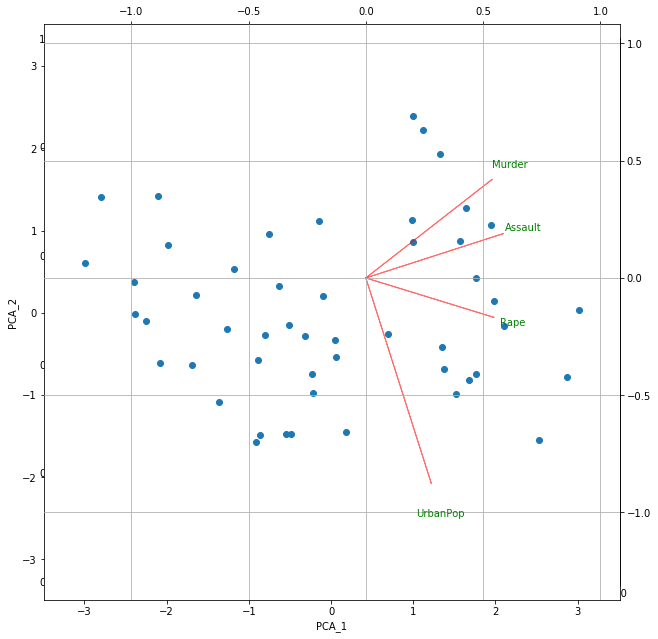

In [86]:
# Biplot of the first two components

fig, ax1 = plt.subplots(figsize=(10, 10));

rect = 0.1, 0.1, 0.8, 0.8

ax1 = fig.add_axes(rect)

ax1.scatter(pca_score_vectors[:,0], pca_score_vectors[:,1])

min_sv = np.min(pca_score_vectors[:,0:2])
max_sv = np.max(pca_score_vectors[:,0:2])
ax1.set_xlim(min_sv - 0.5, max_sv + 0.5)
ax1.set_ylim(min_sv - 0.5, max_sv + 0.5)

ax1.set_xlabel('PCA_1')
ax1.set_ylabel('PCA_2')

ax2 = fig.add_axes(rect,  frameon=False)

for i in range(pca_loadings.shape[0]):
    ax2.arrow(0, 0, pca_loadings[i,0], pca_loadings[i,1],color = 'r',alpha = 0.5)
    ax2.text(pca_loadings[i,0]* 1.15,  pca_loadings[i,1] * 1.15, features[i], color = 'g', 
             ha = 'center', va = 'center')
    
min_l = np.min(pca_loadings[:,0:2])
max_l = np.max(pca_loadings[:,0:2])
ax2.set_xlim(min_l - 0.5, max_l + 0.5)
ax2.set_ylim(min_l - 0.5, max_l + 0.5)

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')

ax2.grid()    

## align both zeros

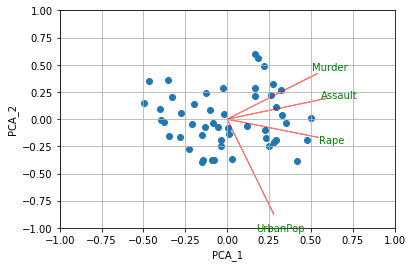

In [78]:
# Plot the first two PCA components

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "VAR"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PCA_{}".format(1))
plt.ylabel("PCA_{}".format(2))
plt.grid()

# Call the function. Use only the 2 PCs.
myplot(pca_score_vectors[:,0:2], pca_loadings[:,0:2], labels=features)
plt.show()

## CREDITS: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

In chapter 10, the authors intepret from the plot the following: 

- The first loading vector places approximately equal weight on Assault, Murder, and Rape, with much less weight on UrbanPop. Hence this component roughly corresponds to a measure of overall rates of serious crimes. 

- The second loading vector places most of its weight on UrbanPop and much less weight on the other three features. Hence, this component roughly corresponds to the level of urbanization of the state.

- Overall, we see that the crime-related variables (Murder, Assault, and Rape) are located close to each other, and that the UrbanPop variable is far from the other three. This indicates that the crime-related variables are correlated with each other—states with high murder rates tend to have high assault and rape rates—and that the UrbanPop variable is less correlated with the other three.


- States with large positive scores on the first component, such as California, Nevada and Florida, have high crime rates, while states like North Dakota, with negative scores on the first component, have low crime rates. 

- California also has a high score on the second component, indicating a high level of urbanization, while the opposite is true for states like Mississippi. 

- States close to zero on both components, such as Indiana, have approximately average levels of both crime and urbanization.

## Compute the proportion of variance explained by each component

- We are usually interested in knowing how much of the information in a given data set is lost by projecting the observations onto the first few principal components? This can be answered by knowing the proportion of variance explained (PVE) by each component.


- The proportion of the variance explained by the _m_th component is the total variance of the dataset divided by the variance explained by the _m_th component 

-The total variance of a dataset is defined as:

![image_total_variance.png](../images/total_variance.png)

-The variance explained by the _m_th component is defined as:

![image_variance_component.png](../images/variance_component.png)

-Therefore, the PVE is given by: 

![image_PVE.png](../images/PVE.png)


- The PVE of each principal component is a positive quantity 

Let's compute the variance explained, and the proportion of variance explained, of each component with sci-kit_learn:

In [88]:
# Print explained variance by each component
variance = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_

variance_df = pd.DataFrame([variance, variance_ratio], 
                           index = ['Variance', 'Variance_ratio'], 
                           columns=columns_pca)
print(variance_df)

                   PCA_1     PCA_2     PCA_3     PCA_4
Variance        2.530859  1.009964  0.363840  0.176969
Variance_ratio  0.620060  0.247441  0.089141  0.043358


### Plot PVE's

- We typically decide on the number of principal components required to visualize the data by examining a scree plot. This is done by eyeballing the scree plot, and looking for a point at which the proportion of variance explained by each subsequent principal component drops off (often refered as the elbow in the scree plot)


Let's plot the PVEs:

Text(0.5, 0, 'Component')

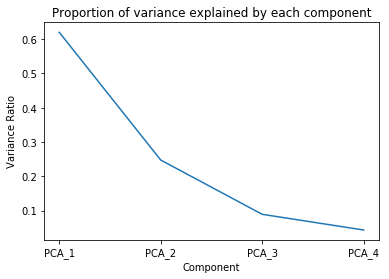

In [89]:
# Plot variance explained by each component 
plt.plot(variance_df.loc['Variance_ratio'])
plt.title('Proportion of variance explained by each component')
plt.ylabel('Variance Ratio')
plt.xlabel('Component')

### Cumulative sum of PVE's

We can also decide to examine the cumulative sum of PVE's:

Text(0.5, 0, 'Component')

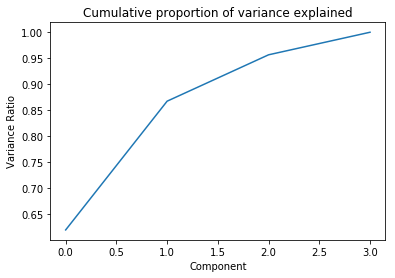

In [90]:
# Plot cumulative sum of variance explained by each component
cumulative_values = np.cumsum(variance_ratio)

plt.plot(cumulative_values)
plt.title('Cumulative proportion of variance explained')
plt.ylabel('Variance Ratio')
plt.xlabel('Component')

## Other uses of PCA

- Apart from producing derived variables for use in supervised learning problems, PCA also serves as a tool for data visualization

- We can also use the principal component score vectors as features for other analyses, such as regression, classification, and clustering (using as input the n × M matrix) 